In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import neighbors

# Question 1

In [2]:
MVN1 = np.random.multivariate_normal(mean = [0,0], cov = [[1,1],[1,4]], size = 25)
MVN2 = np.random.multivariate_normal(mean = [2,2], cov = [[1,1],[1,4]], size = 25)
MVN3 = np.random.multivariate_normal(mean = [2,2], cov = [[4,4],[4,16]], size = 25)

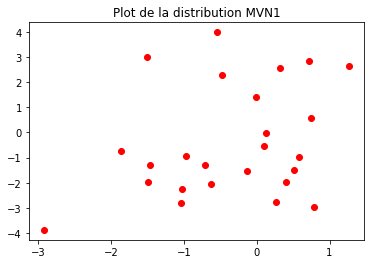

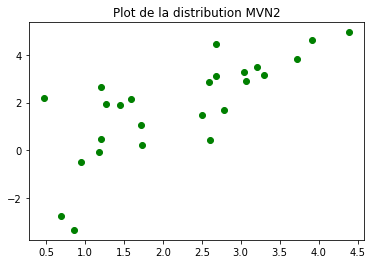

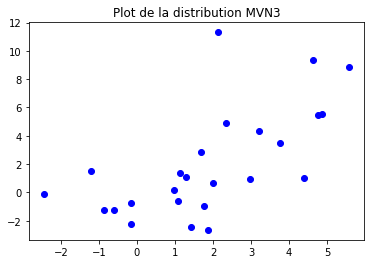

In [3]:
plt.scatter(MVN1[:,0], MVN1[:,1], color = 'r')
plt.title('Plot de la distribution MVN1')
plt.show()
plt.scatter(MVN2[:,0], MVN2[:,1], color = 'g')
plt.title('Plot de la distribution MVN2')
plt.show()
plt.scatter(MVN3[:,0], MVN3[:,1], color = 'b')
plt.title('Plot de la distribution MVN3')
plt.show()

# Question 2

In [4]:
def depthMah(x, data):
    x_minus_mu = x - np.mean(data, axis=0)
    cov = np.cov(data,rowvar=False)
    inv_covmat = np.linalg.pinv(cov)
    left_term = np.dot(x_minus_mu, inv_covmat)
    mahal = np.dot(left_term, x_minus_mu.T)
    return (1/(1+mahal.diagonal()))

In [5]:
X_Mahala1 = depthMah(x=MVN1, data=MVN1)
X_Mahala1 = np.around(X_Mahala1, decimals = 2)

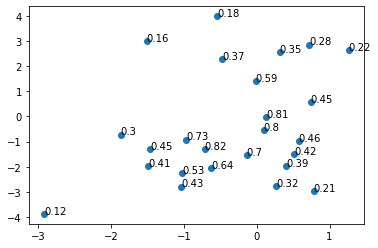

In [6]:
fig, ax = plt.subplots()
ax.scatter(MVN1[:,0], MVN1[:,1])

for i, txt in enumerate(X_Mahala1):
    ax.annotate(txt, (MVN1[:,0][i], MVN1[:,1][i]))

In [7]:
X_Mahala2 = depthMah(x=MVN2, data=MVN2)
X_Mahala2 = np.around(X_Mahala2, decimals = 2)

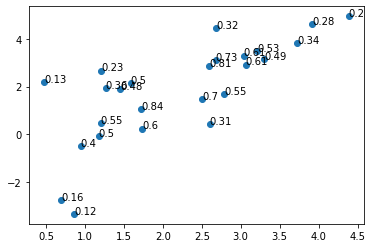

In [8]:
fig, ax = plt.subplots()
ax.scatter(MVN2[:,0], MVN2[:,1])

for i, txt in enumerate(X_Mahala2):
    ax.annotate(txt, (MVN2[:,0][i], MVN2[:,1][i]))

In [9]:
X_Mahala3 = depthMah(x=MVN3, data=MVN3)
X_Mahala3 = np.around(X_Mahala3, decimals = 2)

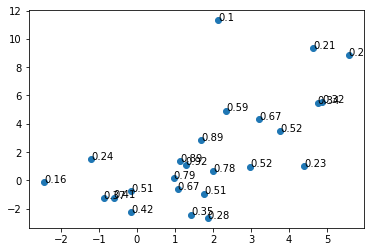

In [10]:
fig, ax = plt.subplots()
ax.scatter(MVN3[:,0], MVN3[:,1])

for i, txt in enumerate(X_Mahala3):
    ax.annotate(txt, (MVN3[:,0][i], MVN3[:,1][i]))

# Question 3

In [11]:
def depthTuk(transform, reference, sample):
    random_vect = np.random.uniform(size = (sample, 2))
    depths = np.ones(len(transform))
    for i in range(len(transform)):
        for j in range(sample):
            prjCurX = transform[i] @ random_vect[j]
            prjData = reference @ random_vect[j]
            depths[i] = min([depths[i], np.mean(prjData >= prjCurX)*0.5/0.52, np.mean(prjData <= prjCurX)*0.5/0.52])
    return depths

In [12]:
X_tuk1 = depthTuk(MVN1, MVN1, sample = 1)
X_tuk1 = np.around(X_tuk1, decimals = 2)

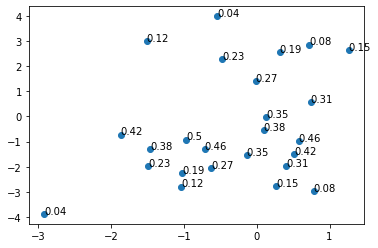

In [13]:
fig, ax = plt.subplots()
ax.scatter(MVN1[:,0], MVN1[:,1])

for i, txt in enumerate(X_tuk1):
    ax.annotate(txt, (MVN1[:,0][i], MVN1[:,1][i]))

In [14]:
X_tuk2 = depthTuk(MVN2, MVN2, sample = 1)
X_tuk2 = np.around(X_tuk2, decimals = 2)

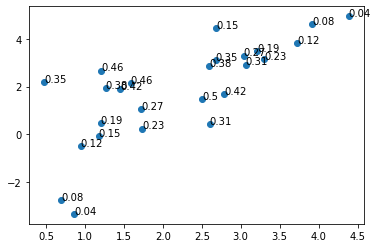

In [15]:
fig, ax = plt.subplots()
ax.scatter(MVN2[:,0], MVN2[:,1])

for i, txt in enumerate(X_tuk2):
    ax.annotate(txt, (MVN2[:,0][i], MVN2[:,1][i]))

In [16]:
X_tuk3 = depthTuk(MVN3, MVN3, sample = 1)
X_tuk3 = np.around(X_tuk3, decimals = 2)

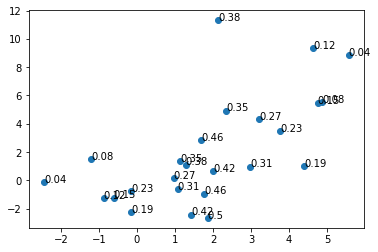

In [17]:
fig, ax = plt.subplots()
ax.scatter(MVN3[:,0], MVN3[:,1])

for i, txt in enumerate(X_tuk3):
    ax.annotate(txt, (MVN3[:,0][i], MVN3[:,1][i]))

# Question 4

In [18]:
from sklearn.base import BaseEstimator, ClassifierMixin
class MaxDepthClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, ndirs=100):
        self.ndirs_ = ndirs
    
    def fit(self, X, y):

        self.X_ = X
        self.y_ = np.array(y)
        self.labs_ = np.unique(y)
        self.oKnn_ = neighbors.KNeighborsClassifier(n_neighbors=1)
        self.oKnn_.fit(self.X_, self.y_)
        return self
    
    def predict(self, X):
        yPred = np.zeros(len(X))
        for i in range(len(X)):
            maxDepth = 0
            maxLab = None
            for curLab in self.labs_:
                curClass = self.X_[self.y_ == curLab]
                curDepth = depthMah(X[i].reshape(1, -1), curClass)
                if curDepth > maxDepth:
                    maxDepth = curDepth
                    maxLab = curLab
            if maxDepth > 0: # classified with data depth
                yPred[i] = maxLab
            else: # an outsider -> do 1NN
                yPred[i] = self.oKnn_.predict(X[i].reshape(1, -1))
        return yPred

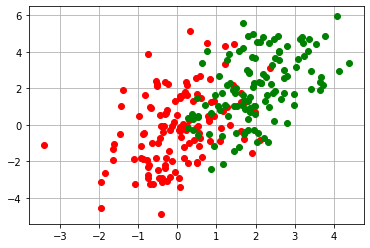

The error rate of the maximum depth classifier (Mahalanobis) = 0.15


In [19]:
# Generate the data set
X = np.concatenate((np.random.multivariate_normal(np.zeros(2), [[1, 1], [1, 4]], 250),
                    np.random.multivariate_normal(np.ones(2) * 2, [[1, 1], [1, 4]], 250)))
y = np.concatenate((np.zeros(250), np.ones(250)))
# Split the data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1)
# Plot the train set
plt.close("all")
plt.plot(X_train[y_train == 0,0], X_train[y_train == 0,1], 'ro')
plt.plot(X_train[y_train == 1,0], X_train[y_train == 1,1], 'go')
plt.grid()
plt.show()
# Train the maximum depth classifier
MaxDepthClassif = MaxDepthClassifier()
MaxDepthClassif.fit(X_train, y_train)
# Report the error rate of the classifier
y_new = MaxDepthClassif.predict(X_test)
print("The error rate of the maximum depth classifier (Mahalanobis) = {:.2}".format(np.mean(y_new != y_test)))

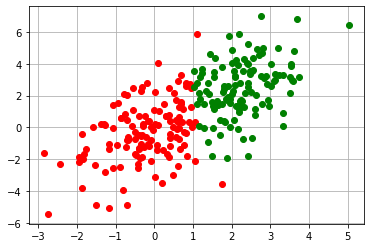

In [21]:
plt.plot(X_test[y_new == 0,0], X_test[y_new == 0,1], 'ro')
plt.plot(X_test[y_new == 1,0], X_test[y_new == 1,1], 'go')
plt.grid()
plt.show()